In [1]:
from keras.layers import Input, Lambda, Dense, Flatten ,Dropout,GlobalAveragePooling2D
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Major Project/Dataset2/Train'
valid_path = '/content/drive/MyDrive/Major Project/Dataset2/Test'

In [3]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False



58889256/58889256 [==============================] - 0s 0us/step


In [4]:
  # useful for getting number of classes
folders = glob('/content/drive/MyDrive/Major Project/Dataset2/Train/*')

In [5]:
print(folders)

['/content/drive/MyDrive/Major Project/Dataset2/Train/Masood Azhar', '/content/drive/MyDrive/Major Project/Dataset2/Train/Dawood Ibrahim Kaskar', '/content/drive/MyDrive/Major Project/Dataset2/Train/Suman', '/content/drive/MyDrive/Major Project/Dataset2/Train/Osama Bin Laden', '/content/drive/MyDrive/Major Project/Dataset2/Train/Pedro Antonio Marin', '/content/drive/MyDrive/Major Project/Dataset2/Train/Joaquin Guzman', '/content/drive/MyDrive/Major Project/Dataset2/Train/Ilyas Kashmiri']


In [6]:
# our layers - you can add more if you want
x = GlobalAveragePooling2D()(vgg.output)# x = Dense(1000, activation='relu')(x)
x = Dropout(0.5)(x)  # Adding dropout for regularization
prediction = Dense(len(folders), activation='softmax')(x)

In [7]:

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [8]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Major Project/Dataset2/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Major Project/Dataset2/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1180 images belonging to 7 classes.
Found 403 images belonging to 7 classes.


In [9]:
label_names = list(training_set.class_indices.keys())
label_names2 = list(test_set.class_indices.keys())

print(label_names)
print(label_names2)


['Dawood Ibrahim Kaskar', 'Ilyas Kashmiri', 'Joaquin Guzman', 'Masood Azhar', 'Osama Bin Laden', 'Pedro Antonio Marin', 'Suman']
['Dawood Ibrahim Kaskar', 'Ilyas Kashmiri', 'Joaquin Guzman', 'Masood Azhar', 'Osama Bin Laden', 'Pedro Antonio Marin', 'Suman']


# techinques to increase accuracy:

    Data Augmentation: Increase data augmentation during training to expose the model to more diverse examples and help it generalize better.

    Regularization: Add regularization techniques, such as dropout or L2 regularization, to prevent overfitting. This helps in making the model less reliant on specific training examples.

    More Data: If possible, gather more diverse training data. A larger and more varied dataset can improve the model's ability to generalize.

    Adjust Model Complexity: If your model is too complex for the size of your dataset, consider simplifying it. This can involve reducing the number of layers, units, or parameters.

    Early Stopping: Implement early stopping during training to prevent overfitting. Monitor the validation loss and stop training when it starts increasing.

    Learning Rate: Adjust the learning rate. A smaller learning rate might help the model converge more gradually and avoid overshooting.

In [10]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
 # fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  callbacks = early_stopping

)

<ipython-input-11-e3ed02913256>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/5
23/37 [=================>............] - ETA: 5:12 - loss: 2.1415 - accuracy: 0.1434

In [ ]:
 # fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  callbacks = early_stopping

)

<ipython-input-48-e3ed02913256>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/5
37/37 [==============================] - 20s 546ms/step - loss: 1.2030 - accuracy: 0.7246 - val_loss: 1.2209 - val_accuracy: 0.8065
Epoch 2/5
37/37 [==============================] - 21s 578ms/step - loss: 1.0921 - accuracy: 0.7686 - val_loss: 1.1452 - val_accuracy: 0.8263
Epoch 3/5
37/37 [==============================] - 20s 538ms/step - loss: 1.0207 - accuracy: 0.8093 - val_loss: 1.0887 - val_accuracy: 0.8139
Epoch 4/5
37/37 [==============================] - 20s 528ms/step - loss: 0.9511 - accuracy: 0.8186 - val_loss: 1.0450 - val_accuracy: 0.8139
Epoch 5/5
37/37 [==============================] - 21s 571ms/step - loss: 0.8904 - accuracy: 0.8390 - val_loss: 0.9841 - val_accuracy: 0.8288


In [ ]:
 # fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  callbacks = early_stopping

)

<ipython-input-49-e3ed02913256>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/5
37/37 [==============================] - 20s 551ms/step - loss: 0.8374 - accuracy: 0.8466 - val_loss: 0.9464 - val_accuracy: 0.8387
Epoch 2/5
37/37 [==============================] - 23s 612ms/step - loss: 0.7889 - accuracy: 0.8619 - val_loss: 0.9102 - val_accuracy: 0.8362
Epoch 3/5
37/37 [==============================] - 19s 525ms/step - loss: 0.7525 - accuracy: 0.8602 - val_loss: 0.8854 - val_accuracy: 0.8387
Epoch 4/5
37/37 [==============================] - 23s 630ms/step - loss: 0.7321 - accuracy: 0.8669 - val_loss: 0.8529 - val_accuracy: 0.8462
Epoch 5/5
37/37 [==============================] - 22s 589ms/step - loss: 0.6852 - accuracy: 0.8797 - val_loss: 0.8228 - val_accuracy: 0.8536


In [ ]:
 # fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  callbacks = early_stopping

)




<ipython-input-51-3dd888e6b9d0>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/5
37/37 [==============================] - 27s 721ms/step - loss: 0.5300 - accuracy: 0.9000 - val_loss: 0.7079 - val_accuracy: 0.8586
Epoch 2/5
37/37 [==============================] - 29s 790ms/step - loss: 0.5222 - accuracy: 0.9076 - val_loss: 0.6879 - val_accuracy: 0.8660
Epoch 3/5
37/37 [==============================] - 19s 508ms/step - loss: 0.5111 - accuracy: 0.9127 - val_loss: 0.6786 - val_accuracy: 0.8511
Epoch 4/5
37/37 [==============================] - 19s 510ms/step - loss: 0.4797 - accuracy: 0.9229 - val_loss: 0.6726 - val_accuracy: 0.8486
Epoch 5/5
37/37 [==============================] - 19s 513ms/step - loss: 0.4618 - accuracy: 0.9237 - val_loss: 0.6512 - val_accuracy: 0.8685


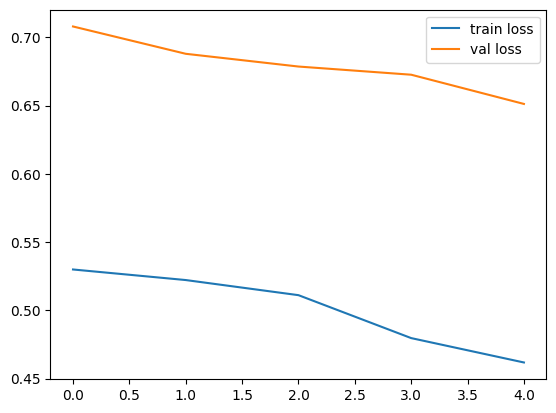

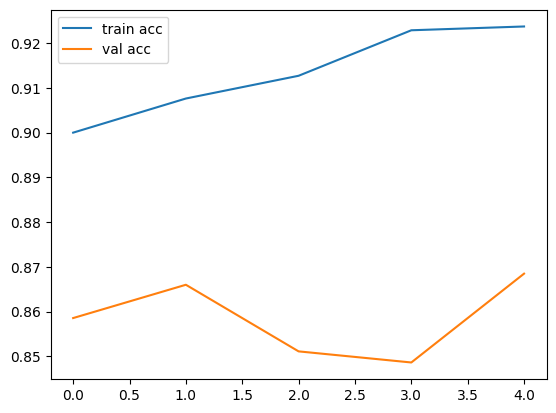

<Figure size 640x480 with 0 Axes>

In [ ]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('/content/drive/MyDrive/Major Project/VGG16 RECOGNITION/Loss vs Val_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

plt.savefig('/content/drive/MyDrive/Major Project/VGG16 RECOGNITION/accuracy vs ')

In [ ]:
import tensorflow as tf

from keras.models import load_model

model.save('/content/drive/MyDrive/Major Project/VGG16 RECOGNITION/vgg16_recognition_model(final).h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# testing


In [1]:
import tensorflow as tf
from keras.models import load_model

model = load_model('/content/drive/MyDrive/Major Project/VGG16 RECOGNITION/vgg16_recognition_model.h5' )


KeyError: ignored

In [ ]:
import numpy as np

def predict_face(image_path):
    preprocessed_image = preprocess_image(image_path)
    predictions = model.predict(preprocessed_image)
    return predictions


In [ ]:
def interpret_predictions(predictions):
    predicted_class_index = np.argmax(predictions)
    predicted_class_label = label_names[predicted_class_index]
    confidence = predictions[0][predicted_class_index]

    return predicted_class_label, confidence

In [ ]:
image_path = '/content/drive/MyDrive/Major Project/Dataset1/Train/Osama Bin Laden/ilyas_0_2973.jpg'
predictions = predict_face(image_path)
predicted_label, confidence = interpret_predictions(predictions)

print(f"Predicted: {predicted_label} with confidence: {confidence}")

1/1 [==============================] - 0s 28ms/step
[1.7855076e-18 0.0000000e+00 0.0000000e+00 5.9438908e-30 1.0000000e+00
 0.0000000e+00 1.1944113e-24 0.0000000e+00 8.7376608e-19]
Predicted: Osama Bin Laden with confidence: 1.0
